In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

test_id = df_test['Id']

n_train = df_train.shape[0]
n_test = df_train.shape[0]

In [34]:
df = pd.concat([df_train,df_test],sort = False).reset_index(drop = True)
df.shape

(2919, 81)

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [37]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [38]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Direct Fill Nan categorical

In [0]:
df['MSZoning'].fillna('RL',inplace = True)
df['Utilities'].fillna('AllPub',inplace = True)

#Exter
df['Exterior1st'].fillna('Plywood',inplace = True)
df['Exterior2nd'].fillna('Plywood',inplace = True)

#MasVnr
df['MasVnrType'][2610] = 'BrkFace'
df['MasVnrType'].fillna('None',inplace = True)

#Bsmt
df['BsmtQual'][2217] = 'Fa'
df['BsmtQual'][2218] = 'TA'
df['BsmtCond'][2040] = 'TA'
df['BsmtCond'][2185] = 'TA'
df['BsmtCond'][2524] = 'TA'
df['BsmtExposure'][948] = 'No'
df['BsmtExposure'][1487] = 'No'
df['BsmtExposure'][2348] = 'No'
df['BsmtFinType2'][332] = 'Rec'

df['BsmtQual'].fillna('NA',inplace = True)
df['BsmtCond'].fillna('NA',inplace = True)
df['BsmtExposure'].fillna('NA',inplace = True)
df['BsmtFinType1'].fillna('NA',inplace = True)
df['BsmtFinType2'].fillna('NA',inplace = True)

#electrical
df['Electrical'].fillna('SBrkr',inplace = True)

#FireplaceQu
df['FireplaceQu'].fillna('NA',inplace = True)

#kitchen
df['KitchenQual'].fillna('TA',inplace = True)

#Functional
df['Functional'].fillna('Typ',inplace = True)

##Garage
df['GarageType'][2576] = 'NA'
df['GarageYrBlt'][2126] = 1958
df['GarageFinish'][2126] = 'Unf'
df['GarageQual'][2126] = 'TA'
df['GarageCond'][2126] = 'TA'

df['GarageType'].fillna('NA',inplace = True)
df['GarageFinish'].fillna('NA',inplace = True)
df['GarageQual'].fillna('NA',inplace = True)
df['GarageCond'].fillna('NA',inplace = True)

df['SaleType'].fillna('WD',inplace = True)

Direct Fill Nan Numerical

In [0]:
df['MasVnrArea'].fillna(0,inplace = True)

#bsmt
df['BsmtFinSF1'].fillna(0,inplace = True)
df['BsmtFinSF2'].fillna(0,inplace = True)
df['BsmtUnfSF'].fillna(0,inplace = True)
df['TotalBsmtSF'].fillna(0,inplace = True)

#bsmt bath
df['BsmtFullBath'].fillna(0,inplace = True)
df['BsmtHalfBath'].fillna(0,inplace = True)


#garage
df['GarageYrBlt'].fillna(0,inplace = True)
df['GarageCars'].fillna(0,inplace = True)
df['GarageArea'].fillna(0,inplace = True)

Imputing NaN

In [0]:
def knn_imputer_nan(x,k):
    imputer = KNNImputer(n_neighbors=k)
    return pd.DataFrame(imputer.fit_transform(x))

df_LotFrontage_LotArea = df[['LotFrontage','LotArea']]
i_LotFrontage = knn_imputer_nan(df_LotFrontage_LotArea,36)
i_LotFrontage.iloc[:,0] = round(i_LotFrontage.iloc[:,0])
df['LotFrontage'] = i_LotFrontage.iloc[:,0]

Dummy Variables 1

In [0]:
Street_map = {'Grvl':0,'Pave':1}
Utilities_map = {'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4}
LandSlope_map = {'Sev':1,'Mod':2,'Gtl':3}
ExterQual_map = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
ExterCond_map = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5} 
BsmtQual_map = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
BsmtCond_map = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
BsmtExposure_map = {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
BsmtFinType1_map = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
BsmtFinType2_map = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
HeatingQC_map = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
KitchenQual_map = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
Functional_map = {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8}
FireplaceQu_map = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
GarageFinish_map = {'NA':0,'Unf':1,'RFn':2,'Fin':3}
GarageQual_map = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
GarageCond_map = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
PavedDrive_map = {'N':1,'P':2,'Y':3}

df.replace({'Street':Street_map,'Utilities':Utilities_map,'LandSlope':LandSlope_map,'ExterQual':ExterQual_map,
           'ExterCond':ExterCond_map,'BsmtQual':BsmtQual_map,'BsmtCond':BsmtCond_map,'BsmtExposure':BsmtExposure_map,
           'BsmtFinType1':BsmtFinType1_map,'BsmtFinType2':BsmtFinType2_map,'HeatingQC':HeatingQC_map,
           'KitchenQual':KitchenQual_map,'Functional':Functional_map,'FireplaceQu':FireplaceQu_map,'GarageFinish':GarageFinish_map,
           'GarageQual':GarageQual_map,'GarageCond':GarageCond_map,'PavedDrive':PavedDrive_map},inplace = True)

df['BsmtCond'] = df['BsmtCond'].apply(int)

Update Numerical Columns

In [0]:
#YearAdd
yr_feat = ['YearBuilt','YearRemodAdd']
for feature in yr_feat:
    df[feature] = df['YrSold'] - df[feature]
    
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Total_porch_SF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
df['Total_Bathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df['Total_Finished_SF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']

df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['hasMisc'] = df['MiscVal'].apply(lambda x: 1 if x > 0 else 0)

Dummy Variables 2

In [0]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].apply(str)
df['MoSold'] = df['MoSold'].apply(str)
cat_features = ['MSSubClass','MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2',
                'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                'Foundation','Heating','CentralAir','Electrical','GarageType','MoSold','YrSold','SaleType','SaleCondition']

for feature in cat_features:
    df_ = pd.get_dummies(df[feature],prefix = feature,drop_first=True)
    df.drop(feature,inplace = True,axis = 1)
    df = pd.concat([df,df_],axis = 1)

In [0]:
df.drop(['Id','Alley','Utilities','Street','PoolArea','PoolQC','Fence','MiscFeature','MiscVal'],axis = 1,inplace=True)

In [46]:
df.head()

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,TotalSF,Total_porch_SF,Total_Bathrooms,Total_Finished_SF,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,hasMisc,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,3,7,5,5,5,196.0,4,3,4,3,1,6,706.0,1,0.0,150.0,856.0,5,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,8,0,0,2003.0,2,2.0,548.0,3,3,3,0,61,0,0,0,208500.0,2566.0,61,3.5,2416.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

Remove Outliers

1)Univariate Using Only Z score

2)Biavariate Using Scatter Or Boxplot

3)Multivariate Using pairplot

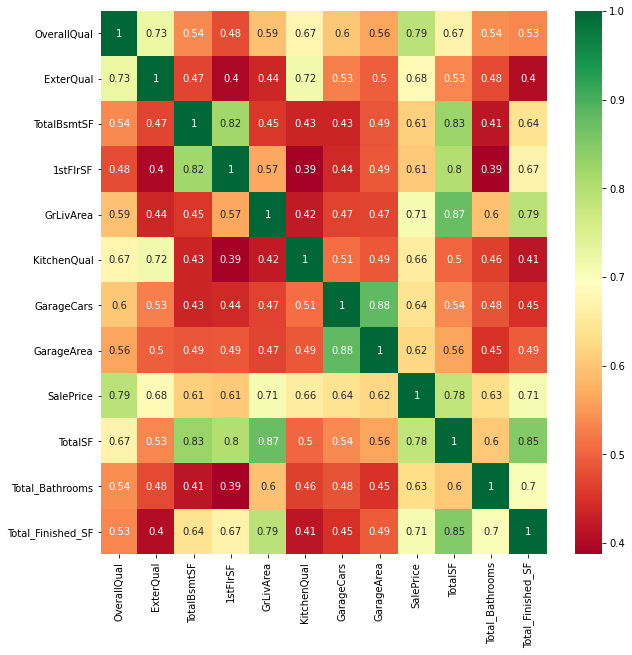

In [47]:
corrmat = df.iloc[:n_train,:].corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.6]
plt.figure(figsize=(10,10))
g = sns.heatmap(df.iloc[:n_train,:][top_corr_features].corr(),annot=True,cmap="RdYlGn")

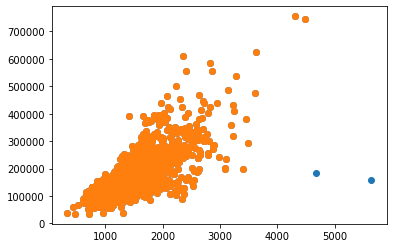

In [48]:
# GrLivArea
plt.scatter(df['GrLivArea'][:n_train],df['SalePrice'][:n_train])
df = df.drop(df[((df['GrLivArea']>4000) & (df['SalePrice']<300000))].index)
n_train -= 2
plt.scatter(df['GrLivArea'][:n_train],df['SalePrice'][:n_train])

#OverallQual
# sns.boxplot(df['OverallQual'],df['SalePrice'])

#ExterQual
# sns.boxplot(df['ExterQual'],df['SalePrice'])

Convert Skewed Distribution to Normal(Continuous Values)

1)Take Log

2)Box Cox

3)Square Root

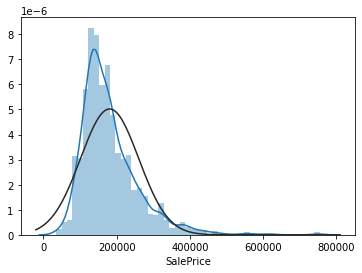

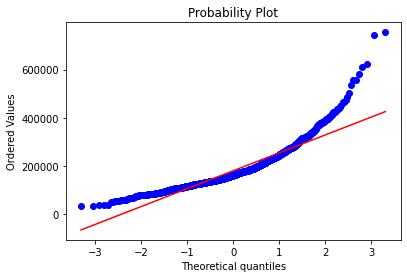

In [49]:
#SalePrice 
sns.distplot(df['SalePrice'][:n_train],fit = norm)

pl = plt.figure()
stats.probplot(df['SalePrice'][:n_train],plot=plt)
plt.show()

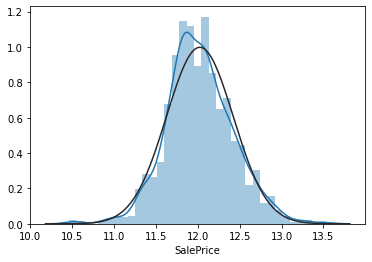

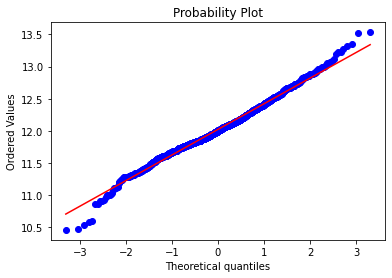

In [50]:
df['SalePrice'][:n_train] = np.log1p(df['SalePrice'][:n_train])

sns.distplot(df['SalePrice'][:n_train] , fit=norm);

pl = plt.figure()
stats.probplot(df['SalePrice'][:n_train],plot=plt)
plt.show()

In [51]:
continuous_features = [feature for feature in df.columns if len(df[feature].unique())>10 and df[feature].dtype != 'object' and 'Year' not in feature and 'Yr' not in feature]
continuous_features,len(continuous_features)

(['LotFrontage',
  'LotArea',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'TotRmsAbvGrd',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'SalePrice',
  'TotalSF',
  'Total_porch_SF',
  'Total_Bathrooms',
  'Total_Finished_SF'],
 23)

In [52]:
continuous_features.remove('SalePrice')
sk = df[continuous_features].apply(lambda x:skew(x)).sort_values(ascending = False)
sk = pd.DataFrame(sk)
sk

,0
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
MasVnrArea,2.621719
OpenPorchSF,2.529358
WoodDeckSF,1.844792
Total_porch_SF,1.379521


In [53]:
ch = [0,0.03,0.05,0.08,0.1,0.13,0.15]
df__ = pd.DataFrame()
for choice in ch:
    df_ = pd.DataFrame(skew(boxcox1p(df[continuous_features],choice)),columns=[choice],index = continuous_features)
    df__ = pd.concat([df__,df_],axis = 1)
    
df__ = pd.concat([pd.DataFrame(skew(df[continuous_features]),columns = ['Org'],index = continuous_features),df__],axis = 1)


skew_result = {}
for i in df__.index:
    min_ = 'Org'
    for j in df__.columns:
        if df__.loc[i,j]>=0 and df__.loc[i,j]<df__.loc[i,min_]:
            min_ = j
            
    skew_result[i] = min_
    

print(skew_result)
skew_result = {k:v for k,v in skew_result.items() if v != 'Org'}

{'LotFrontage': 'Org', 'LotArea': 0.13, 'MasVnrArea': 0.0, 'BsmtFinSF1': 'Org', 'BsmtFinSF2': 0.0, 'BsmtUnfSF': 'Org', 'TotalBsmtSF': 'Org', '1stFlrSF': 0.0, '2ndFlrSF': 0.0, 'LowQualFinSF': 0.0, 'GrLivArea': 0.03, 'TotRmsAbvGrd': 0.0, 'GarageArea': 'Org', 'WoodDeckSF': 0.0, 'OpenPorchSF': 0.08, 'EnclosedPorch': 0.0, '3SsnPorch': 0.0, 'ScreenPorch': 0.0, 'TotalSF': 'Org', 'Total_porch_SF': 'Org', 'Total_Bathrooms': 'Org', 'Total_Finished_SF': 0.13}


In [0]:
#boxcox1p for other continuous values 
for k,v in skew_result.items():
    df[k] = boxcox1p(df[k],v)

Model

In [0]:
df_train = df.iloc[:n_train,:]
df_test = df.iloc[n_train:,:]

x = df_train.drop('SalePrice',axis = 1)
y = df_train['SalePrice']
df_test.drop('SalePrice',inplace = True,axis = 1)

In [0]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [0]:
#Validation
 kf = KFold(5, shuffle=True, random_state=42)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x.values, y.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.01, n_estimators=5000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=5000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread = -1)

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber')

rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True)
                          


alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kf))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kf))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kf, l1_ratio=e_l1ratio))


stack_gen = StackingCVRegressor(regressors=(xgb, lgbm, gbr, rf,ridge,lasso,elasticnet),
                                meta_regressor=xgb,
                                use_features_in_secondary=True,
                                cv = 5)
                              
                                